In [4]:
# Data frome NYC Open DAta=A
https://data.cityofnewyork.us/Transportation/Automated-Traffic-Volume-Counts/7ym2-wayt/about_data

SyntaxError: invalid decimal literal (1903787633.py, line 2)

In [6]:
import pandas as pd
import numpy as np 
import seaborn as sns
import json

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates

import seaborn as sns
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point

In [17]:
!pwd
!ls 

/Users/zoelye/Documents/Brainstation
Aug13
Aug14
Aug19
Aug2
Aug20
Aug21
Aug22
Aug23
Aug6
Aug7
Aug8
August1
August15
August16
Deliverables
Exploratory_NYC_opendata_carcounts.ipynb
July30
July31
SQL_data
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
capstone
july26
july29
july_pythongIntro
tableau_intro


In [19]:
raw_dat=pd.read_csv('/Users/zoelye/Documents/Brainstation/capstone/Data_traffic/Automated_Traffic_Volume_Counts_20240825.csv')


In [21]:
raw_dat['Yr'].value_counts()

Yr
2021    85810
2022    78652
Name: count, dtype: int64

In [23]:
# this is slow command
raw_dat['date'] = raw_dat.apply(lambda row: pd.to_datetime(f"{row['Yr']}-{row['M']}-{row['D']}"), axis=1)

In [27]:
# Create a new column for year and month
raw_dat['year_month'] = raw_dat['date'].dt.to_period('M').astype(str)
# Group by year_month and category, and count observations
monthly_counts = raw_dat.groupby(['year_month', 'Boro']).size().reset_index(name='count')

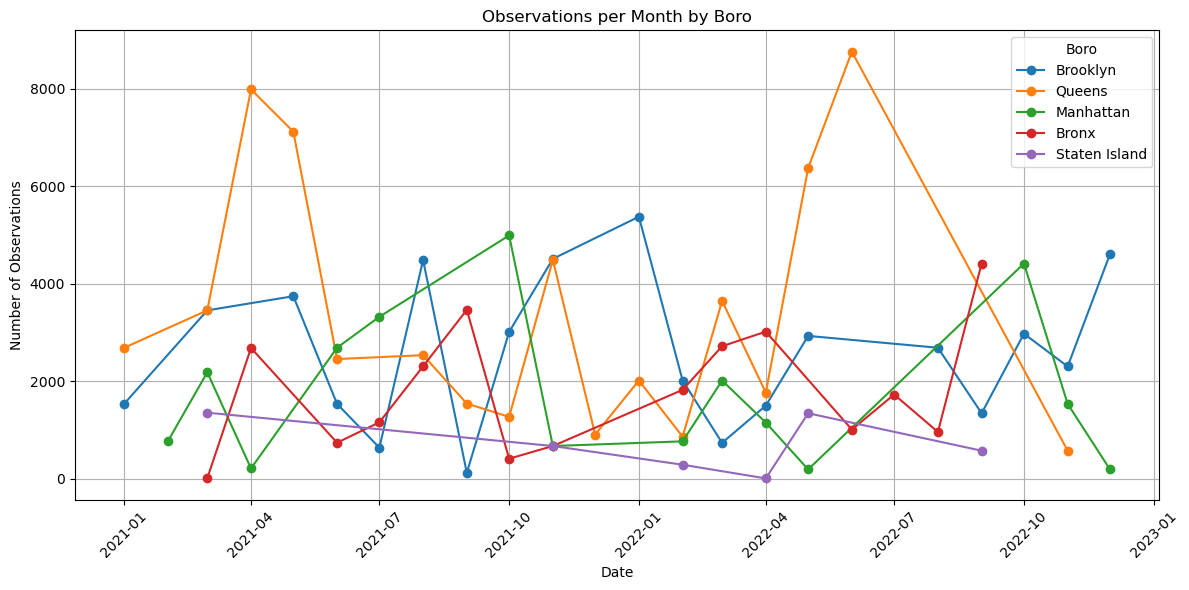

In [31]:
# UGLY GRAPHE
# Convert 'year_month' to datetime for plotting
monthly_counts['year_month'] = pd.to_datetime(monthly_counts['year_month'])
# Plot using Matplotlib
plt.figure(figsize=(12, 6))
for category in monthly_counts['Boro'].unique():
    subset = monthly_counts[monthly_counts['Boro'] == category]
    plt.plot(subset['year_month'], subset['count'], marker='o', label=category)

plt.title('Observations per Month by Boro')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.legend(title='Boro')
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
# Group by year_month and category, and count observations
monthly_counts = raw_dat.groupby(['year_month', 'Boro']).size().unstack(fill_value=0).reset_index()
# Convert 'year_month' to datetime for plotting
monthly_counts['year_month'] = pd.to_datetime(monthly_counts['year_month'])

In [55]:
monthly_counts.head()

Boro,year_month,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,2021-01-01,0,1536,0,2687,0
1,2021-02-01,0,0,768,0,0
2,2021-03-01,11,3455,2184,3455,1356
3,2021-04-01,2683,0,212,7988,0
4,2021-05-01,0,3745,0,7121,0


In [33]:
mpl.rcParams['font.sans-serif'] = ['Arial']
mpl.rcParams['font.size'] = 18  # Set default font size for text
mpl.rcParams['axes.labelsize'] = 12  # Font size for x and y labels
mpl.rcParams['axes.titlesize'] = 18  # Font size for title
mpl.rcParams['xtick.labelsize'] = 8  # Font size for x-axis tick labels
mpl.rcParams['ytick.labelsize'] = 12  # Font size for y-axis tick labels
mpl.rcParams['legend.fontsize'] = 8  # Font size for legend

<Figure size 800x600 with 0 Axes>

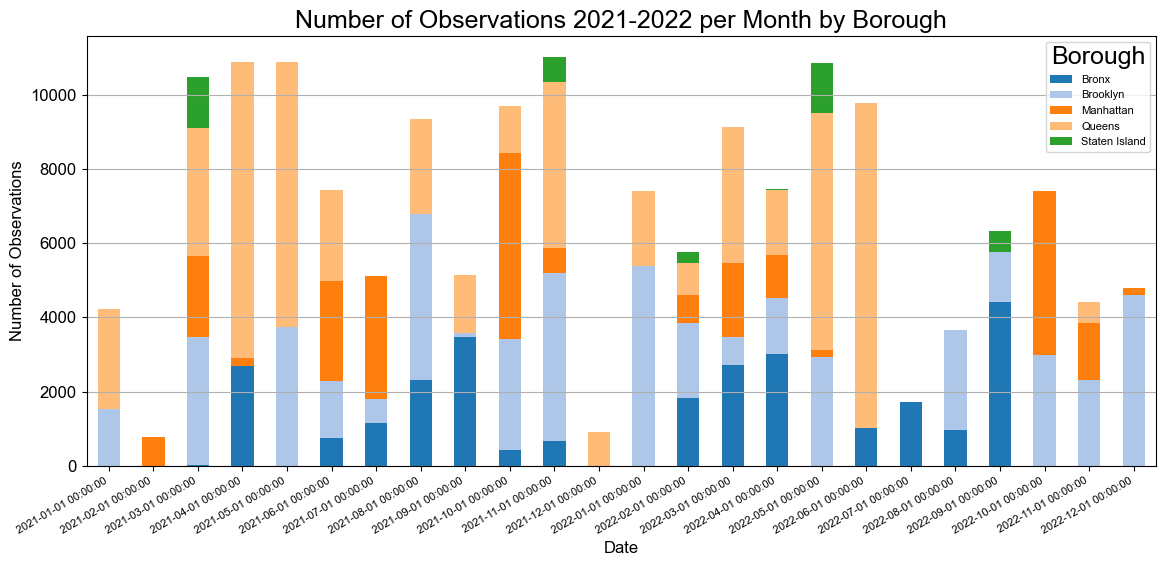

In [65]:
# PLOT BARCHART PER BOROUGH
plt.figure(figsize=(8, 6))
# Set Seaborn color palette
palette =  sns.color_palette("tab20", len(monthly_counts.columns) - 1)
# Plot stacked bar chart
monthly_counts.set_index('year_month').plot(kind='bar', stacked=True, color=palette.as_hex(), figsize=(12, 6))
plt.title('Number of Observations 2021-2022 per Month by Borough')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.grid(False)

# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# Rotate and align the tick labels
plt.gcf().autofmt_xdate()
plt.legend(title='Borough')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('monthly_observation_counts_by_boro.jpeg', format='jpeg', dpi=300)
plt.show()

In [61]:
# LOCATION NUMBER OF MEASUREMENTS
plt.savefig('monthly_observation_counts_by_boro.jpeg', format='jpeg', dpi=300)

<Figure size 640x480 with 0 Axes>

In [49]:
raw_dat[raw_dat['RequestID']='044343']

SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (2591129756.py, line 1)